In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
transfusion_path="../input/new-transfusion-new/transfusion_new.csv"

In [3]:
transfusion_data=pd.read_csv(transfusion_path)

In [4]:
transfusion_data.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0

In [5]:
transfusion_data.tail()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
743                23                  2                    500   
744                21                  2                    500   
745                23                  3                    750   
746                39                  1                    250   
747                72                  1                    250   

     Time (months)  whether he/she donated blood in March 2007  
743             38                                           0  
744             52                                           0  
745             62                                           0  
746             39                                           0  
747             72                                           0

In [7]:
transfusion_data.shape

(748, 5)

In [8]:
transfusion_data.describe()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        748.000000         748.000000             748.000000   
mean           9.506684           5.514706            1378.676471   
std            8.095396           5.839307            1459.826781   
min            0.000000           1.000000             250.000000   
25%            2.750000           2.000000             500.000000   
50%            7.000000           4.000000            1000.000000   
75%           14.000000           7.000000            1750.000000   
max           74.000000          50.000000           12500.000000   

       Time (months)  whether he/she donated blood in March 2007  
count     748.000000                                  748.000000  
mean       34.282086                                    0.237968  
std        24.376714                                    0.426124  
min         2.000000                                    0.000000  
25%        16.000000                                    0.000000  
50%        28.000000                                    0.000000  
75%        50.000000                                    0.000000  
max        98.000000                                    1.000000

In [9]:
transfusion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [10]:
transfusion_data.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [11]:
transfusion_data.nunique()

Recency (months)                              31
Frequency (times)                             33
Monetary (c.c. blood)                         33
Time (months)                                 78
whether he/she donated blood in March 2007     2
dtype: int64

In [12]:
transfusion_data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

<AxesSubplot:>

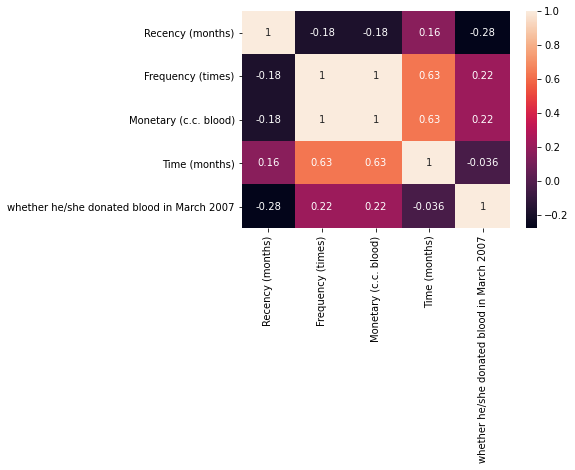

In [13]:
#relationship Analysis
corelation=transfusion_data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

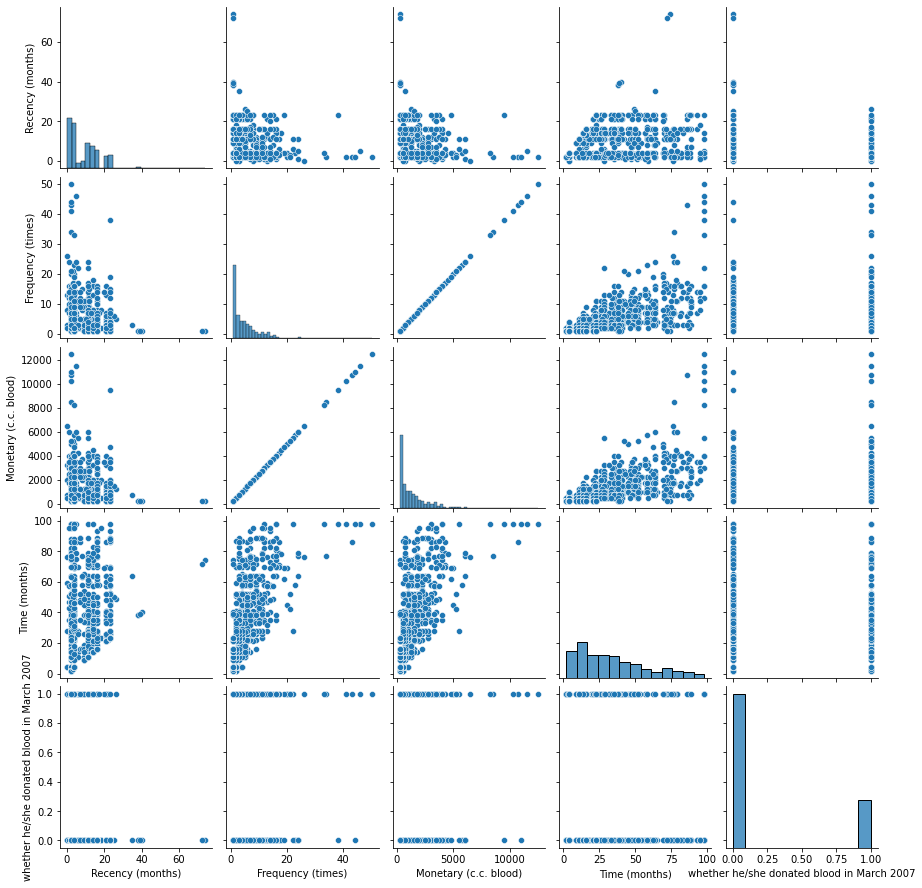

In [14]:
sns.pairplot(transfusion_data)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency (times)'>

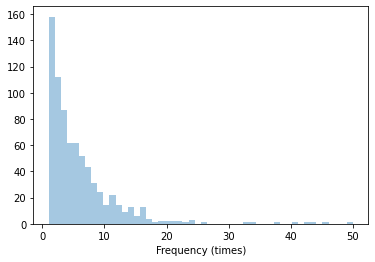

In [15]:
sns.distplot(a=transfusion_data['Frequency (times)'],kde=False,bins=50)

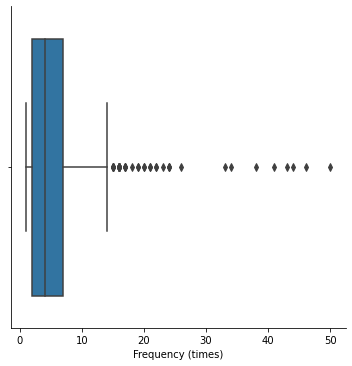

In [16]:
sns.catplot(x='Frequency (times)',kind='box',data=transfusion_data)

In [17]:
transfusion_data.rename(
    columns = {'whether he/she donated blood in March 2007': 'target'},
    inplace = True
)

transfusion_data.head(2)

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   

   target  
0       1  
1       1

In [18]:
print('Target incidence proportions:\n')
print(round(transfusion_data.target.value_counts(normalize = True) * 100,3))

Target incidence proportions:

0    76.203
1    23.797
Name: target, dtype: float64


In [19]:
#Splitting transfusion into train and test datasets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    transfusion_data.drop(columns='target'),
    transfusion_data.target,
    test_size=0.25,
    random_state=42,
    stratify=transfusion_data.target
)

print('First two rows of X_train: ')
X_train.head(4)

First two rows of X_train: 


Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
334                16                  2                    500             16
99                  5                  7                   1750             26
116                 2                  7                   1750             46
661                16                  2                    500             16

In [20]:
#Selecting model using TPOT

from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {transform}')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7422459184429089

Generation 4 - Current best internal CV score: 0.7422459184429089

Generation 5 - Current best internal CV score: 0.7456308339276876

Best pipeline: MultinomialNB(Normalizer(input_matrix, norm=l2), alpha=0.001, fit_prior=True)

AUC score: 0.7637

Best pipeline steps:
1. Normalizer()
2. MultinomialNB(alpha=0.001)


In [21]:
X_train.var().round(3)

Recency (months)              66.929
Frequency (times)             33.830
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
dtype: float64

In [22]:
import numpy as np

# Copy X_train and X_test into X_train_normed and X_test_normed
X_train_normed,X_test_normed = X_train.copy(), X_test.copy()

# Specify which column to normalize
col_to_normalize = "Monetary (c.c. blood)"

# Log normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

# Check the variance for X_train_normed
X_test_normed.var().round(3)


Recency (months)      61.692
Frequency (times)     34.887
Time (months)        533.939
monetary_log           0.828
dtype: float64

In [23]:
from sklearn import linear_model

# Instantiate LogisticRegression
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)

# Train the model
logreg.fit(X_train_normed, y_train)

# AUC score for tpot model
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7891


In [24]:

from operator import itemgetter

sorted(
    [('tpot', tpot_auc_score), ('logreg', logreg_auc_score)],
    key = itemgetter(1),
    reverse = True
)

[('logreg', 0.7890972663699937), ('tpot', 0.7637476160203432)]